## Regression: Boston housing with RF & XGBoost

* [Data Processing](#processing)
* [Random Forest model](#rf)
* [XGBoost model](#xgb)

Variables in order (in bold the target one):<BR><BR>
 CRIM     per capita crime rate by town<BR>
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.<BR>
 INDUS    proportion of non-retail business acres per town<BR>
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<BR>
 NOX      nitric oxides concentration (parts per 10 million)<BR>
 RM       average number of rooms per dwelling<BR>
 AGE      proportion of owner-occupied units built prior to 1940<BR>
 DIS      weighted distances to five Boston employment centres<BR>
 RAD      index of accessibility to radial highways<BR>
 TAX      full-value property-tax rate per USD 10,000<BR>
 PTRATIO  pupil-teacher ratio by town<BR>
 AFRO     1000(AFRO - 0.63)^2 where AFRO is the proportion of blacks by town<BR>
 LSTAT    &#37; lower status of the population<BR>
 **MEDV     Median value of owner-occupied homes in USD 1000's<BR>**
    
Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
    
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261 of the latter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Processing<a id="processing" />

In [2]:
data=pd.read_excel("DATA/boston.xlsx", index_col=0)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AFRO,LSTAT,MEDV
Id,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AFRO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='Frequency'>

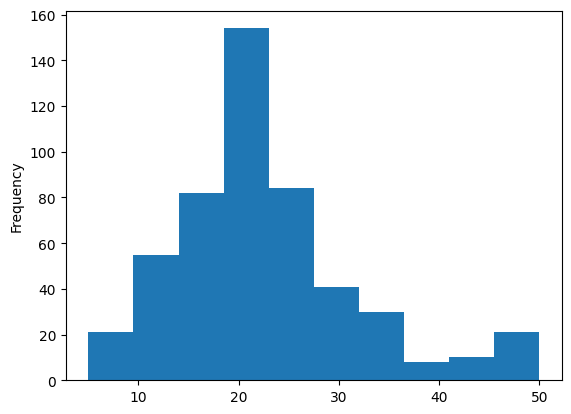

In [4]:
data['MEDV'].plot(kind = 'hist')

## Random Forest model<a id="rf" />

We try first with Random Forest

In [5]:
# Separate features from response field
X, y = data.iloc[:,:-1], data.iloc[:,-1]

# Partition dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state= 123)

In [6]:
rf = RandomForestRegressor(n_estimators = 200, random_state=123)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=123)

In [7]:
rf_pred_tr = rf.predict(X_train)
rf_pred_ts = rf.predict(X_test)
rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)
print("Train set RMSE: %f " % (rmse_train))
print("Test set RMSE: %f " % (rmse_test))

Train set RMSE: 1.382722 
Test set RMSE: 3.681124 


Now we do a grid searching of best hyper parameters

In [8]:
rf_params = {'max_depth': [6,7,8],'min_samples_leaf':[0.08,0.1,0.12], 'max_features':[0.5,0.7,0.9]}

from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(estimator = rf,
                     param_grid = rf_params,
                     cv=5,
                     scoring='neg_mean_squared_error',
                     verbose=2)

grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.2s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.08; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.3s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.1; total time=   0.2s
[CV] END max_depth=6, max_features=0.5, min_samples_leaf=0.12; total time=   0.2s
[CV] END max_depth=6, max_features=0.5, m

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200,
                                             random_state=123),
             param_grid={'max_depth': [6, 7, 8],
                         'max_features': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [0.08, 0.1, 0.12]},
             scoring='neg_mean_squared_error', verbose=2)

In [9]:
best_param=grid_rf.best_params_
print('Best parameters found for rf: ', best_param)
print('Lowerst RMSE found for rf: ', np.sqrt(np.sqrt(np.abs(grid_rf.best_score_))))

Best parameters found for rf:  {'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 0.08}
Lowerst RMSE found for rf:  2.2302140351751563


In [10]:
from sklearn.model_selection import GridSearchCV
grid_rf = RandomForestRegressor(n_estimators = 200, random_state=123, **best_param, verbose=1)

grid_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s


RandomForestRegressor(max_depth=6, max_features=0.9, min_samples_leaf=0.08,
                      n_estimators=200, random_state=123, verbose=1)

In [11]:
# predictions
rf_pred_tr = grid_rf.predict(X_train)
rf_pred_ts = grid_rf.predict(X_test)
rmse_train = mean_squared_error(y_train, rf_pred_tr)**(1/2)
rmse_test = mean_squared_error(y_test, rf_pred_ts)**(1/2)
print("Train set RMSE: %f " % (rmse_train))
print("Test set RMSE: %f " % (rmse_test))

Train set RMSE: 4.458109 
Test set RMSE: 4.637900 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


We have found a model that does not overfit

We can display the most important features:


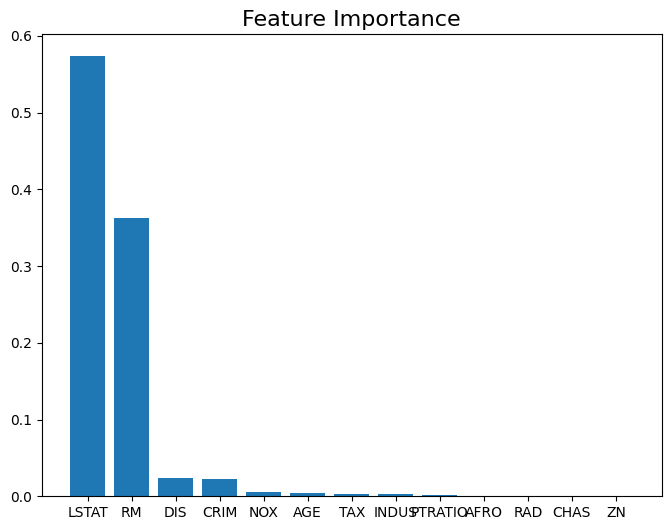

In [12]:
plt.figure(figsize=(8,6))
importances = grid_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X_train.columns[indices], importances[indices]) 
plt.title('Feature Importance', fontsize=16);

## XGBoost model<a id="xgb" />

Let's attempt an XGBoost Regressor to see if we can get a better performance

In [13]:
# !pip install xgboost
import xgboost as xgb

# Create DMatrix for Cross Validation: an optimized & compressed matrix used to store the datasets optimally in xgboost
# It is very recommendable 
data_dmatrix = xgb.DMatrix(data=X, label=y)

xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 20)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
preds = xg_reg.predict(X_train)
preds_test = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_train, preds))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print("Attempt 1 Train RMSE: %f" % (rmse))
print("Attmept 1 Test RMSE: %f" % (rmse_test))

Attempt 1 Train RMSE: 0.395936
Attmept 1 Test RMSE: 3.708230


Add cross validation to yield better performance. First, create params dictionary

Hyperparameters:

- colsample_bytree: fraction of features randomly selected to build each tree in the training process. A lower value reduces correlation between trees: less overfitting
- learning_rate: contribution of each tree to the final model. The lower, the less overfitting, but more trees are required
- alpha: L1 regularization (penalizes linearly every new variable)
- lambda: L2 regularization (penalizes quadratically every new variable)

In [15]:
params = {'objective':'reg:squarederror', 'colsample_bytree':0.3, 'learning_rate':0.1, 'max_depth':5,
         'alpha':10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold = 3, num_boost_round=200, early_stopping_rounds=5,
                   metrics="rmse", as_pandas=True, seed=123)

# num_boost_round: rounds. A high value might lead to overfitting
# early_stopping_rounds: if the evaluation metric does not improve in this number of consecutive rounds, training stops. Risk of overfitting if empty
# as_pandas=True: predictions will be returned as a dataframe, instead of a dictionary
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,8.770798,0.177981,8.863473,0.362677
1,8.417938,0.164167,8.572054,0.376347
2,8.000628,0.143783,8.253671,0.354402
3,7.446014,0.109524,7.761689,0.324164
4,6.944920,0.085525,7.343192,0.304991
...,...,...,...,...
195,1.276148,0.038490,3.417940,0.324620
196,1.275090,0.038814,3.417412,0.324332
197,1.274508,0.039087,3.416747,0.324532
198,1.274508,0.039087,3.416747,0.324532


Review cross validated results, it seems there is some improvement

In [16]:
print((cv_results['test-rmse-mean']).tail(5))

195    3.417940
196    3.417412
197    3.416747
198    3.416747
199    3.414768
Name: test-rmse-mean, dtype: float64


#### Grid search

We can also add grid search to find best parameters. First, define parameters. <BR>Second, initialize model and run cross validation on initialized estimator<BR>
Third, fit cross validated model    

In [17]:
gbm_param_grid = {'learning_rate': [0.01, 0.1, 0.2], 'subsample':[0.3,0.4,0.5]} #subsample controls % of data used
gbm = xgb.XGBRegressor()

grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_mse.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.1s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.3s
[CV] END ..................learning_rate=0.01, subsample=0.3; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.1s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.4; total time=   0.2s
[CV] END ..................learning_rate=0.01, subsample=0.5; total time=   0.2s
[CV] END ..................learning_rate=0.01, su

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'subsample': [0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowest RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning_rate': 0.1, 'subsample': 0.3}
Lowerst RMSE found:  2.093723312416839


And finally, we visualize feature importance, which is calculated using importance_type parameter (weight by default: number of times the variable appears)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

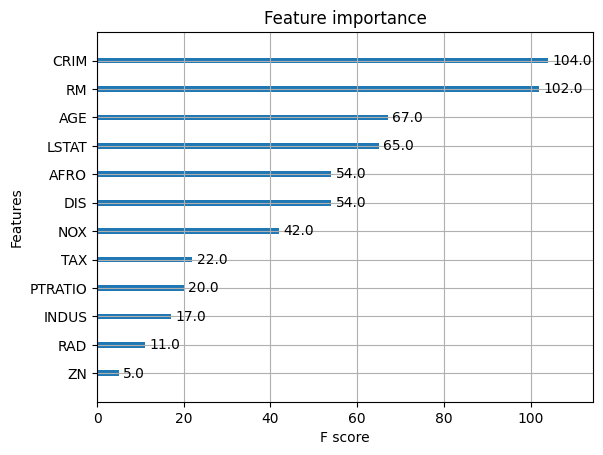

In [19]:
xgb.plot_importance(xg_reg, importance_type="weight")

# weight: number of times the variable has been used
# gain: average gain whenever variable is used
# cover: how many samples were affected by using each variable